In [2]:
import xarray as xr
import numpy as np
import dask.array as da
import os
from datetime import datetime

In [10]:
folders = [folder for folder in os.listdir('./') if os.path.isdir(os.path.join('./', folder))]
folders.sort()


In [28]:
all_paths = []
for folder in folders:
    folder_path = os.path.join('./', folder)

    netcdf_paths = [f'{folder_path}/{nc}' for nc in os.listdir(f'./{folder}/') if nc.endswith('.nc')]
    netcdf_paths.sort()
    all_paths.append(netcdf_paths)
    de = xr.open_mfdataset(netcdf_paths, combine='by_coords', compat='override')
    dates = netcdf_paths[0].split('_')[-1].split('.')[0]
    filename = f'forecast_{folder}_{dates}.nc'
    de.to_netcdf(filename)
    de.close()


In [24]:
all_paths 

[['./r1i1p1/hurs_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/pr_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/psl_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/rsds_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/sfcWind_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/tas_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/tasmax_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/tasmin_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc'],
 ['./r2i1p1/hurs_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r2i1p1_20250101-20250630.nc',
  './r2i1p1/pr_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r2i1p1_20250101-20

In [25]:
ds = xr.open_dataset(all_paths[0][2])

In [26]:
ds

<xarray.Dataset>
Dimensions:    (time: 181, bnds: 2, lon: 147, lat: 170)
Coordinates:
  * time       (time) datetime64[ns] 2025-01-01T12:00:00 ... 2025-06-30T12:00:00
  * lon        (lon) float64 5.037 5.112 5.188 5.262 ... 15.76 15.84 15.91 15.99
  * lat        (lat) float64 47.02 47.07 47.12 47.17 ... 55.33 55.38 55.42 55.48
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    psl        (time, lat, lon) float32 ...
Attributes: (12/42)
    CDI:                            Climate Data Interface version 2.4.2 (htt...
    Conventions:                    CF-1.4
    source:                         DWD-EPISODES2022
    institution:                    Deutscher Wetterdienst
    contact:                        klima.Offenbach@dwd.de
    references:                     https://www.dwd.de/klimavorhersagen; http...
    ...                             ...
    cmor_version:                   2.9.1
    terms_of_use:                   https://www.dwd.de/EN/service/terms/terms...
    doi:                            10.5676/DWD/SEASONAL-EPI-DE_V2022.01
    creation_date:                  2025-01-04T05:24:12Z
    tracking_id:                    967a6680-ab06-49ed-9567-5ea0a132cb78
    CDO:                            Climate Data Operators version 2.4.2 (htt...

In [3]:
de = xr.open_mfdataset(netcdf_paths, combine='by_coords')

In [4]:
start = datetime.now()


de.hurs[500:5500, 200, 200]

dur = datetime.now() - start
print(dur.total_seconds())

0.004942


In [16]:
de.close()

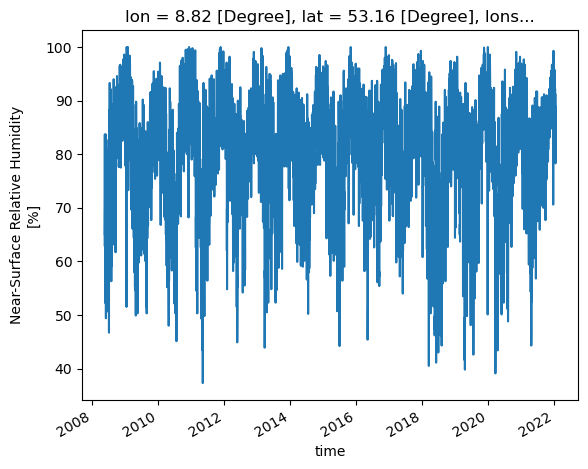

In [5]:
de.hurs[500:5500, 210, 210].plot()

In [18]:
del de

In [12]:
for a in range(200, 300):
    for b in range(200, 300):
        de.pr[2000:3000, a, b]